# Supervised Learning: Support Vector Machines

### SVM:

* classifier separates data points using a hyperplane with the largest amount of margin

    * builds a model (from labelled data)
    * non-probabilistic
    * representation of the data as points in space
    * each separate categories is divided by a gap (wider is better)
    * discriminative classifier
        * not generative: model the distribution of each underlying class
        * discriminative: find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other
    * predictions: data are mapped into that space & belong to a category based on which side of the gap they fall.

### Uses include:

* classification
* regression
* outliers detection

### Applications include:

* face detection
* intrusion detection
* classification of emails
* news articles and web pages
* classification of genes
* handwriting recognition

### Advantages:

* robust to outliers
* Effective with many features, especially where the number of dimensions (p) exceeds the number of samples (n).
    * Uses a subset of training points in the decision function, so it is also memory efficient.
        * relatively few support vectors => compact models
* Versatile: different Kernel functions can be specified for the decision function
* Kernal SVM algorithms speed is proportional to the number of support vectors not the number of data points in the training data set (as would be the case for regression)

### Disadvantages:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

# Motivating Example

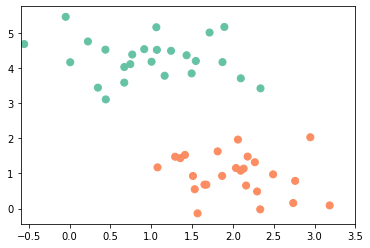

In [1]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, 
                  centers=2,
                  # required for plt
                  random_state=0, 
                  cluster_std=0.60)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Set2(y), s=50);
plt.xlim(-.6, 3.5)

plt.show()

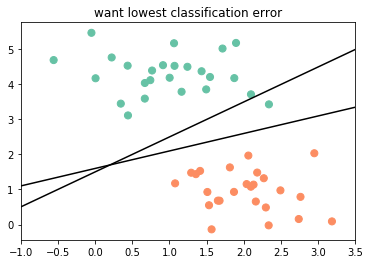

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Set2(y), s=50);
plt.xlim(-.6, 3.5)

import numpy as np
xfit = np.linspace(-1, 3.5)

for m, b, d in [(0.5, 1.6, 0.05), (1, 1.5, 0.05)]:
    yfit = m * xfit + b
    line, = plt.plot(xfit, yfit, c = 'black')

plt.xlim(-1, 3.5)
plt.title("want lowest classification error")
plt.show()

### selecting the best hyperplane

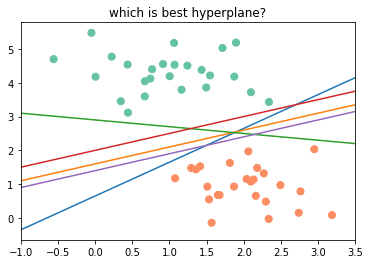

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, 
                  centers=2,
                  # required for plt
                  random_state=0, 
                  cluster_std=0.60)

import matplotlib.pyplot as plt
# https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html#qualitative
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Set2(y), s=50);
plt.xlim(-.6, 3.5)

import numpy as np
xfit = np.linspace(-1, 3.5)

for m, b, d in [(1, 0.65, 0.3), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.14), (0.5, 2, 0), (0.5, 1.4, 0)]:
    yfit = m * xfit + b
    line, = plt.plot(xfit, yfit)
    #plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
    #                 alpha=0.4, color=line.get_color())

plt.xlim(-1, 3.5)
plt.title("which is best hyperplane?")
plt.show()

### margin around boundary

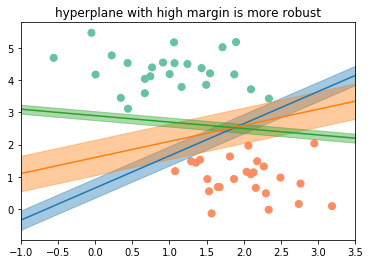

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, 
                  centers=2,
                  # required for plt
                  random_state=0, 
                  cluster_std=0.60)

import matplotlib.pyplot as plt
# https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html#qualitative
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Set2(y), s=50);
plt.xlim(-.6, 3.5)

import numpy as np
xfit = np.linspace(-1, 3.5)

for m, b, d in [(1, 0.65, 0.3), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.14)]:
    yfit = m * xfit + b
    line, = plt.plot(xfit, yfit)
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     alpha=0.4, color=line.get_color())

plt.xlim(-1, 3.5)
plt.savefig("images/max_margin.png")
plt.title("hyperplane with high margin is more robust")
plt.show()

#### What is an SVM?

* given that the data are "grouped", we want to find a hyperplane (line if 2D dataset) that separates the data

    * generates optimal hyperplane in an iterative manner, which is used to minimize an error

#### What is the objective of an SVM?

* to have a large margin around the decision boundary (maximum margin)

#### What are the "support vectors"?

* data points, which are closest to the decision boundary (and any incorrectly classified points)

* these points that are NOT in the Zero Loss flat part of the Hinge Loss

#### What is this margin?

* gap between the two lines on the closest class points

* perpendicular distance from the line to support vectors or closest points

    * i.e. distances between the nearest data point (either class) and hyper-plane

* How far can you get from decision boundary line until you make contact with the training data points

* If the margin is larger in between the classes, then it is considered a good margin
    * all the lines in the plot above divide the points into their two groups
        * the green line has a narrow margin
        * whilst the orange line has a better margin (perhaps not the optimal line)
            * better because it has more space around the decision boundary
        
(NB: Usually tought to split the data linearly)

### objective function = hinge loss function with L2 regularisation

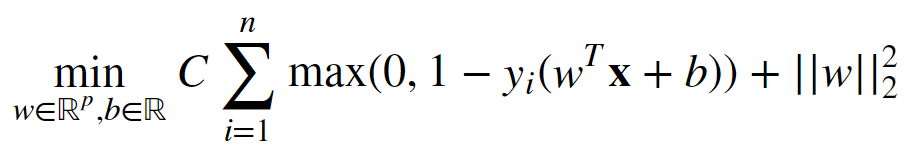

In [5]:
from IPython.display import Image
Image(filename = 'imagesDisplayedInJupyter/hinge.png', 
      width=500, height=500)

# $$\min_{w \in \mathbb{R}^p, b \in \mathbf{R}} C \sum_{i=1}^n \max(0, 1 - y_i (w^T\mathbf{x} +b)) + ||w||^2_2$$

#### objective function = hinge loss + regularisation term

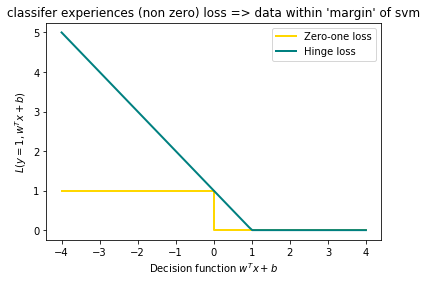

In [6]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")

plt.legend(loc="upper right")
plt.xlabel(r"Decision function $w^Tx + b$")
plt.ylabel("$L(y=1, w^Tx + b) $")
plt.title("classifer experiences (non zero) loss => data within 'margin' of svm")
plt.show()

# utilise sklearn's "svm"

In [7]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=10, centers=2,
                  random_state=0, cluster_std=0.60)
X[:, 0] *= 1.5

In [8]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
clf.support_vectors_

array([[3.14520731, 3.7174206 ],
       [0.78521045, 1.28983482],
       [3.48237819, 1.09786826]])

In [10]:
clf.n_support_  # number of support vectors for each class

array([1, 2])

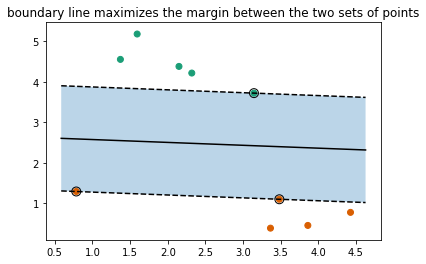

In [11]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min() - .2, X[:, 0].max() + .2)

yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, alpha=.3)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))

# circle the support vectors (training points that touch the margin)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')

plt.title("boundary line maximizes the margin between the two sets of points")

plt.show()

boundary line = hyperplane: $$\hat{y} = \text{sign}(w^T \mathbf{x} + b)$$

In [12]:
clf.predict([[2.0, 2.0]])

array([1])

In [13]:
clf.predict([[1.0, 1.0]])

array([1])

In [14]:
clf.predict([[3.0, 3.0]])

array([0])

#### objective function = hinge loss + regularisation term

* WANT: a hyperplane with the largest minimum margin
* WANT: a hyperplane that correctly separates as many instances as possible

## regularisation (second want)

* the process of adding information in order to solve an ill-posed problem or to prevent overfitting

* C = penalty parameter of the error term

    * how much you want to avoid misclassifying each training example

    * determines the influence of the misclassification on the objective function

    * controls the trade off between smooth decision boundary and classifying the training points correctly.

* LARGE: optimization will choose a smaller-margin separating hyperplane if that hyperplane does a better job of getting all the training points classified correctly (low bias, high var)
* SMALL: optimization will choose a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. (high bias, low var)

### why L2?

in order to achieve prediction consistency, the penalty parameter should be kept constant as the number of samples grow

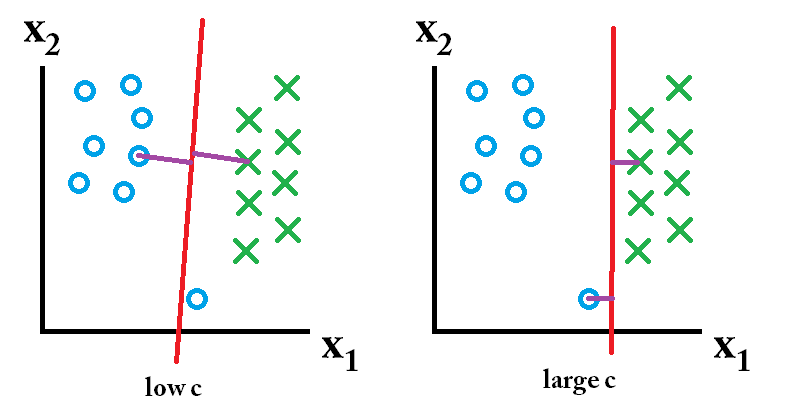

In [15]:
from IPython.display import Image
Image(filename = 'imagesDisplayedInJupyter/C_low_large.png', 
      width=500, height=500)

# LHS: low c: large minimum margin (purple)
#             neglect the blue circle outlier 
#                 (failed to classify correct)
#                [Less Penalty/More Tolearance] 
# RHS: high c: not neglect the outlier => smaller margin

### C = 0.1 = high regularisation

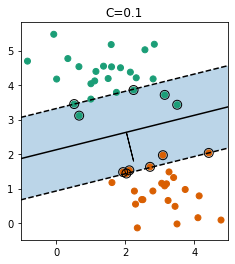

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
X[:, 0] *= 1.5

# fit the model
clf = svm.SVC(kernel='linear', C=.1)
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min() - .2, X[:, 0].max() + .2)

yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, alpha=.3)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')
plt.gca().set_aspect("equal")
plt.arrow(xx[25], yy[25], w[0], w[1])
plt.gca().set_aspect("equal")

plt.xlim(xx[0], xx[-1])
plt.title("C=0.1")
plt.savefig("images/max_margin_C_0.1.png")
plt.show()

### C = 2 = low regularisation

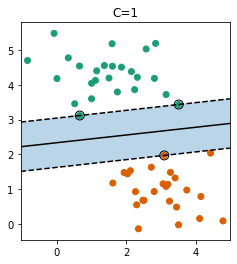

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
X[:, 0] *= 1.5

# fit the model
clf = svm.SVC(kernel='linear', 
              C = 2)
            # C = Penalty parameter of the error term
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min() - .2, X[:, 0].max() + .2)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin


# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, alpha=.3)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')
#plt.arrow(xx[25], yy[25], w[0], w[1])
plt.gca().set_aspect("equal")
plt.xlim(xx[0], xx[-1])
plt.title("C=1")
plt.savefig("images/max_margin_C_2.png")
plt.show()

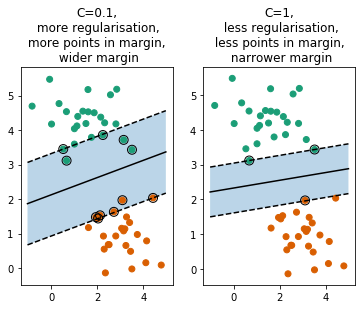

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
X[:, 0] *= 1.5

# fit the model
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
clf = svm.SVC(kernel='linear', 
              C = 0.1)
            # C = Penalty parameter of the error term
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min() - .2, X[:, 0].max() + .2)

yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin


fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Regularisation vs Margin')

# plot the line, the points, and the nearest vectors to the plane
ax1.set_title("C=0.1,\n more regularisation,\n more points in margin, \n wider margin")
ax1.plot(xx, yy, 'k-')
ax1.plot(xx, yy_down, 'k--')
ax1.plot(xx, yy_up, 'k--')
ax1.fill_between(xx, yy_down, yy_up, alpha=.3)
ax1.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
ax1.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')
#ax1.arrow(xx[25], yy[25], w[0], w[1])


# fit the model with C = 1
clf = svm.SVC(kernel='linear', 
              C = 1)
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min() - .2, X[:, 0].max() + .2)

yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
ax2.set_title("C=1,\n less regularisation,\n less points in margin, \n narrower margin")
ax2.plot(xx, yy, 'k-')
ax2.plot(xx, yy_down, 'k--')
ax2.plot(xx, yy_up, 'k--')
ax2.fill_between(xx, yy_down, yy_up, alpha=.3)
ax2.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
ax2.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')
#ax2.arrow(xx[25], yy[25], w[0], w[1])

plt.savefig("images/max_margin_C_0.1_vs_1.png")
plt.show()

### circled points = "support vectors"
* data points, which are closest to the hyperplane boundary
* are within the margin
* most difficult to classify
* **influence the (optimal) solution**
    * i.e. specify the model
    * any points further from the margin which are on the correct side do not modify the fit
        * because these points do not contribute to the loss function used to fit the model
        * **ADVANTAGE of SVM: insensitivity to the exact behavior of distant points**
        * MAIN difference to Neural Networks or Linear Regression

NB: with more regularisation => points in the margin have less influence

### What is "C" ?

* how much outliers are taken into account in calculating Support Vectors

    * low C => decision surface smooth
    * high C => classifies training examples correctly (model has freedom to select more data samples as support vectors)

### Moving Support Vectors

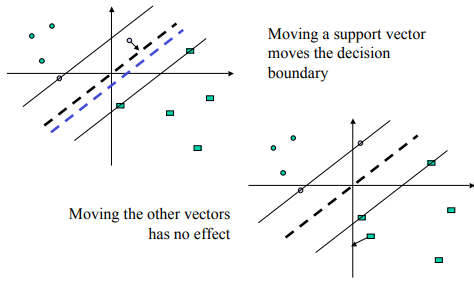

In [19]:
from IPython.display import Image
Image(filename = 'imagesDisplayedInJupyter/movingSupportVectors.png', 
      width=400)

# only the support vectors determine the boundary